# 主成分分析

## 分析の手順
1. 使用するデータセットを確認する
2. 主成分と主成分得点を求める
3. 分析結果の精度を確認する
4. 分析結果を解釈する
  - 第一主成分のグラフ
  - 変数のグラフ

## 参考にする資料
- マンガでわかる統計学「因子分析編」 高橋信 オーム社
- http://www.statistics.co.jp/reference/software_R/statR_9_principal.pdf
- http://blog.amedama.jp/entry/2017/04/02/130530
- http://ohke.hateblo.jp/entry/2017/08/11/230000

---

## １．使用するデータセットの確認
取得元：http://www.statistics.co.jp/reference/statistical_data/statistical_data.htm

### 分析の目的
**各科目の得点から、優秀な生徒と総合得点に影響を及ぼす科目を把握する**

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# データのインポート
df = pd.read_csv('seiseki.csv')
df.head()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,30,43,51,63,60,66,37,44,20
1,39,21,49,56,70,72,56,63,16
2,29,30,23,57,69,76,33,54,6
3,95,87,77,100,77,82,78,96,87
4,70,71,78,67,72,82,46,63,44


In [3]:
df.describe()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,52.331325,39.602410,45.614458,49.885542,42.331325,62.457831,57.740964,47.307229,39.084337
std,21.835858,21.456335,24.236127,21.408130,22.894855,17.188298,26.577943,22.519397,29.507351
min,0.000000,4.000000,0.000000,9.000000,2.000000,15.000000,2.000000,2.000000,0.000000
25%,35.000000,23.000000,28.000000,31.000000,25.250000,52.000000,35.250000,31.250000,12.000000
50%,53.000000,35.000000,43.000000,49.000000,41.500000,65.000000,60.000000,48.500000,35.000000
75%,70.000000,53.750000,63.750000,65.750000,58.750000,75.750000,82.000000,65.000000,66.750000
max,96.000000,90.000000,100.000000,100.000000,96.000000,99.000000,99.000000,100.000000,99.000000


国語、社会、数学、理科、音楽、美術、体育、技科、英語の得点  
おそらく100点満点で、平均値は全般に低い

---

## ２．主成分と主成分得点を求める

In [4]:
# scikit-learnのPCAライブラリを使用して、主成分分析する
pca = PCA()
pca.fit(df)

PCA(copy=True, n_components=None, whiten=False)

実行はこれだけ

---

## ３．分析結果の精度を確認する

In [5]:
# 寄与率
pca.explained_variance_ratio_

array([ 0.65728336,  0.1445361 ,  0.0554714 ,  0.04325809,  0.02564213,
        0.02235507,  0.02205383,  0.01749933,  0.01190071])

<Container object of 9 artists>

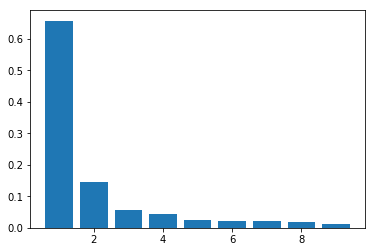

In [6]:
# 寄与率をプロットする
x = np.arange(1,10)
y = pca.explained_variance_ratio_
plt.bar(x, y)

In [7]:
# 固有ベクトル
pca.components_

array([[ 0.3409922 ,  0.34041758,  0.37791685,  0.33721105,  0.34818955,
         0.22328615,  0.1639193 ,  0.30336298,  0.47044282],
       [-0.12016459,  0.11683065,  0.16966609,  0.20037872, -0.00559508,
        -0.16034103, -0.92721768,  0.12404493,  0.04596244],
       [ 0.11913742,  0.02853467, -0.32532621,  0.1187427 ,  0.0206913 ,
         0.19571592, -0.00550172,  0.74661434, -0.51851614],
       [-0.14644965,  0.00440724,  0.21414419,  0.18183134,  0.64090179,
         0.24140458, -0.02390869, -0.36974313, -0.54157162],
       [ 0.53303394,  0.20639671, -0.06365218, -0.19973887, -0.31012018,
         0.60103324, -0.24740476, -0.31470365, -0.10800471],
       [-0.33997208, -0.24937617, -0.46789421, -0.13600416,  0.32834882,
         0.5005022 , -0.1623205 ,  0.04887445,  0.44469803],
       [ 0.21642993,  0.52952746, -0.61946947,  0.02623713,  0.30486528,
        -0.38692821, -0.02968317, -0.20762538,  0.04101548],
       [ 0.57248513, -0.53303916,  0.05839382, -0.37180094,  0

第一主成分：0.65728336  
第二主成分：0.1445361  
で十分な累積寄与率となっている。

第一主成分との関連性が最も強い教科は、固有ベクトルが「0.47044282」の『英語』  
第二主成分との関連性が最も強い教科は、固有ベクトルが「-0.92721768」の『体育』  
であることがわかった。

---

## ４．分析結果を解釈する

第一主成分、第二主成分から主成分分析の結果を解釈する

In [8]:
# 第一主成分、第二主成分のみを得るよう主成分分析
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, n_components=2, whiten=False)

In [9]:
# 寄与率
pca.explained_variance_ratio_

array([ 0.65728336,  0.1445361 ])

In [10]:
# 固有ベクトル
pca.components_

array([[ 0.3409922 ,  0.34041758,  0.37791685,  0.33721105,  0.34818955,
         0.22328615,  0.1639193 ,  0.30336298,  0.47044282],
       [-0.12016459,  0.11683065,  0.16966609,  0.20037872, -0.00559508,
        -0.16034103, -0.92721768,  0.12404493,  0.04596244]])

In [11]:
# 固有ベクトルをデータフレーム化
plt_df2 = pd.DataFrame(pca.components_, columns=['国語','社会','数学','理科','音楽','美術','体育','技科','英語'])
plt_df2

,国語,社会,数学,理科,音楽,美術,体育,技科,英語
0,0.340992,0.340418,0.377917,0.337211,0.348190,0.223286,0.163919,0.303363,0.470443
1,-0.120165,0.116831,0.169666,0.200379,-0.005595,-0.160341,-0.927218,0.124045,0.045962


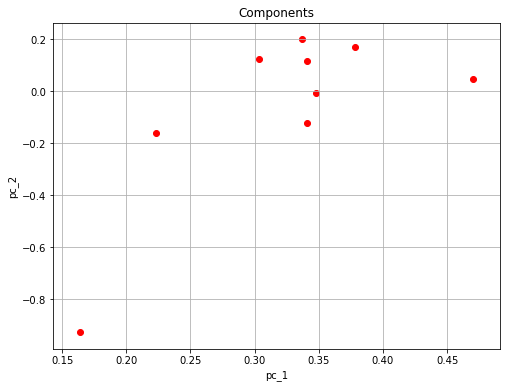

In [12]:
# 第一主成分と第二主成分の固有ベクトルを可視化
plt.figure(figsize=(8, 6))
x = plt_df2.T[0]
y = plt_df2.T[1]
plt.scatter(x,y,color='red')

plt.title("Components")
plt.xlabel("pc_1")
plt.ylabel("pc_2")
plt.grid(True)

- 第一主成分は総合得点と筆記試験の関連性が高く、実技試験の関連性が低いことを示している
- 第二主成分は総合得点と体育の強い関連性を示している

In [13]:
# 第一主成分と第二主成分でデータフレーム化
pc = pca.fit_transform(df)
plt_df = pd.DataFrame(pc)
plt_df.head()

,0,1
0,-6.438840,23.899147
1,-2.157204,2.043280
2,-22.651879,19.199671
3,116.513709,1.907651
4,54.565790,20.228717


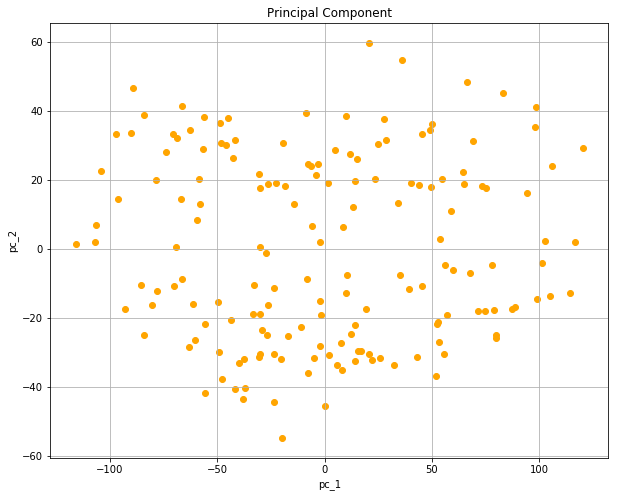

In [14]:
# 第一主成分と第二主成分を可視化
plt.figure(figsize=(10, 8))
x = plt_df[0]
y = plt_df[1]
plt.scatter(x,y,color='orange')

plt.title("Principal Component")
plt.xlabel("pc_1")
plt.ylabel("pc_2")
plt.grid(True)

４象限に分けると、  
右上：筆記試験に強く、体育は苦手  
右下：筆記試験に強く、体育も得意  
左上：筆記試験は苦手、体育も苦手  
左下：筆記試験は苦手、体育も得意  

**matplotlibではどの点がどのレコードに該当するかわかりにくいため、bokehに変更したい**